In [12]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [2]:
cancer_data = load_breast_cancer()

In [4]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
data = cancer_data.data
target = cancer_data.target

In [11]:
target = target.reshape(569,1)

In [14]:
data_final = np.concatenate([data, target],axis=1)

In [15]:
df = pd.DataFrame(data_final)

In [17]:
feature = cancer_data.feature_names

In [19]:
df.columns = list(feature) + ['label']

In [21]:
df['label'].replace(0, 'Benign', inplace=True)
df['label'].replace(1, 'Malignant', inplace=True)

In [22]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


## PCA

In [27]:
from sklearn.preprocessing import StandardScaler
X = df.loc[:, feature].values
X = StandardScaler().fit_transform(X)

In [29]:
data_scaled = pd.DataFrame(X,columns=feature)

In [30]:
data_scaled.shape

(569, 30)

In [45]:
from sklearn.decomposition import PCA

pca_ = PCA(n_components=2)

pca_data = pca_.fit_transform(X)

In [46]:
pca_.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [41]:
pca_data.shape

(569, 30)

In [39]:
X.shape

(569, 30)

In [47]:
pca_df  = pd.DataFrame(pca_data,columns=["PC1", "PC2"])

In [48]:
pca_df

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [49]:
pca_.explained_variance_ratio_

array([0.44272026, 0.18971182])

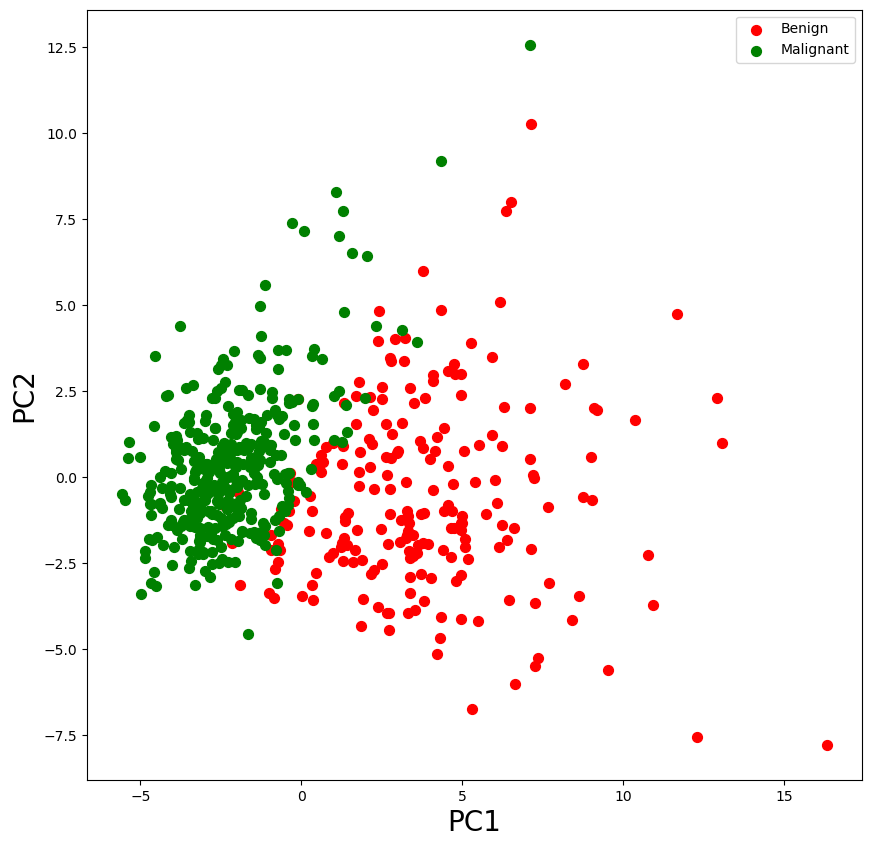

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
targets =['Benign', 'Malignant']
colors = ['r','g']

for target,color in zip(targets, colors):
    maskindex = df['label'] == target
    plt.scatter(pca_df.loc[maskindex, 'PC1'],
                pca_df.loc[maskindex, 'PC2'],
                c=color,s=50)

plt.legend(targets)



In [56]:
from sklearn.decomposition import PCA

pca_full = PCA()

pca_data = pca_full.fit_transform(X)

In [59]:
cumsum = np.cumsum(pca_full.explained_variance_ratio_)

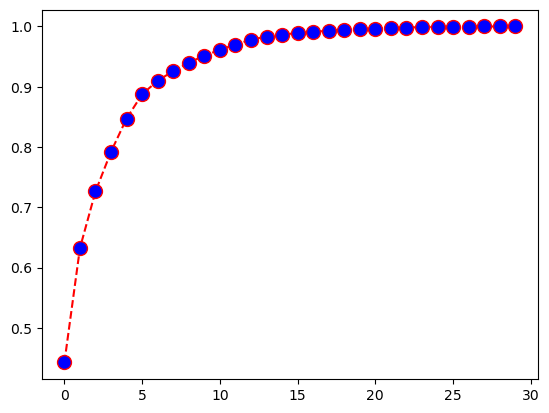

In [65]:
plt.plot(range(len(cumsum)), cumsum,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)

In [66]:
cumsum

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [67]:
from sklearn.decomposition import PCA

pca_95 = PCA(n_components=0.95)

pca_data_95 = pca_95.fit_transform(X)

In [69]:
pca_data_95.shape

(569, 10)

# tSNE

In [70]:
from sklearn.manifold import TSNE

tsne_ = TSNE(n_components=2)

tsne_data = tsne_.fit_transform(X)

In [71]:
tsne_df  = pd.DataFrame(tsne_data,columns=["tSNE1", "tSNE2"])

In [72]:
tsne_df

,tSNE1,tSNE2
0,38.578911,2.494724
1,24.303450,6.943472
2,31.938700,3.564493
3,20.674002,-13.834522
4,28.447147,-3.087035
...,...,...
564,32.605865,7.068975
565,30.615534,-5.049426
566,15.465737,4.268593
567,39.618515,4.754086


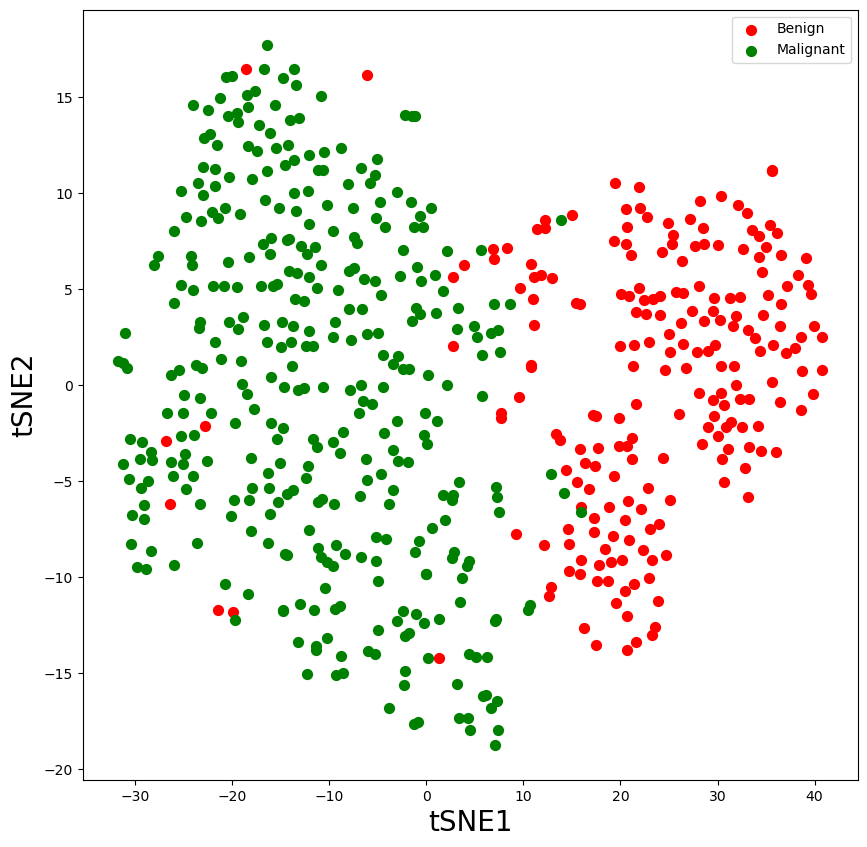

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('tSNE1', fontsize=20)
plt.ylabel('tSNE2', fontsize=20)
targets =['Benign', 'Malignant']
colors = ['r','g']

for target,color in zip(targets, colors):
    maskindex = df['label'] == target
    plt.scatter(tsne_df.loc[maskindex, 'tSNE1'],
                tsne_df.loc[maskindex, 'tSNE2'],
                c=color,s=50)

plt.legend(targets)



# Clustering

In [75]:
from sklearn.datasets import make_blobs

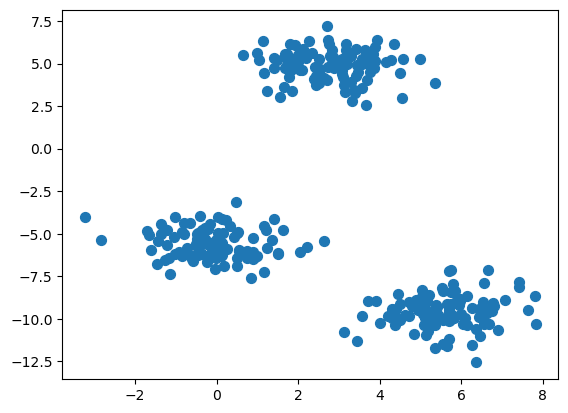

In [84]:
X ,y= make_blobs(n_samples=300, n_features=2, centers=3,random_state=10)


plt.scatter(x= X[:,0], y=X[:,1],s=50)



In [86]:
from sklearn.cluster import KMeans

In [87]:
kmeans_cluster = KMeans(n_clusters=3)
kmeans_cluster.fit(X)

/Users/yjhouma/opt/anaconda3/envs/hacktiv8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [90]:
kmeans_cluster.cluster_centers_

array([[-0.09193383, -5.55939953],
       [ 2.79065611,  4.90806187],
       [ 5.58625317, -9.59640301]])

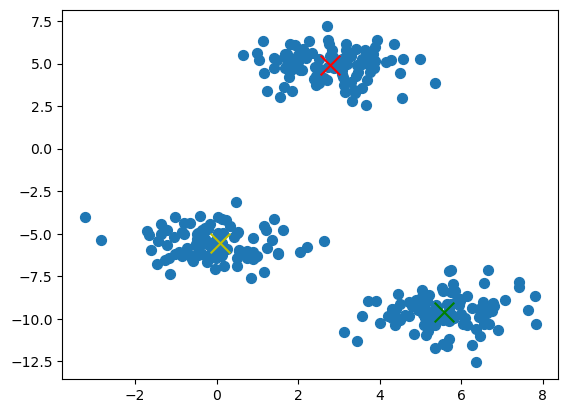

In [96]:
plt.scatter(x= X[:,0], y=X[:,1],s=50)

plt.scatter(0.09193383, -5.55939953, s=200,c='y', marker='x')
plt.scatter(2.79065611,  4.90806187, s=200,c='r', marker='x')
plt.scatter(5.58625317, -9.59640301, s=200,c='g', marker='x')



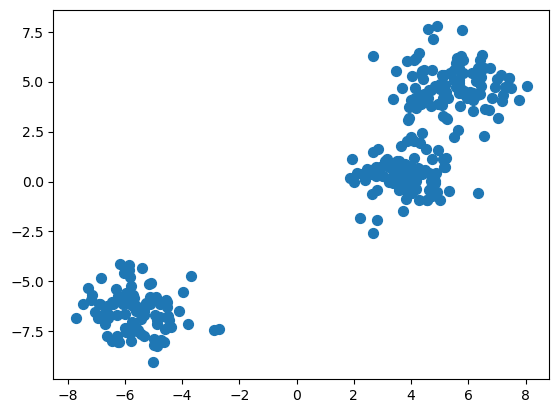

In [106]:
X ,y= make_blobs(n_samples=300, n_features=5, centers=3,random_state=10)


plt.scatter(x= X[:,0], y=X[:,3],s=50)



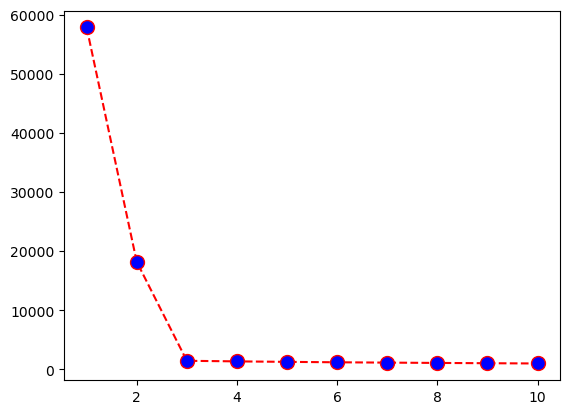

In [109]:
inertias = []
for k in range(1,11):
    kmeans_cluster = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans_cluster.fit(X)
    inertias.append(kmeans_cluster.inertia_)

plt.plot(range(1,11), inertias,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)

In [110]:
kmeans_cluster = KMeans(n_clusters=3, random_state=10, n_init=10)
kmeans_cluster.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=10)

In [111]:
kmeans_cluster.predict(X)

array([0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0,
       2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2,
       2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2], d

In [112]:
y

array([0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0,
       0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0,
       2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1])

## Wholesale data

In [113]:
data = pd.read_csv("data/Wholesale customers data.csv")
data.drop(labels=["Channel", "Region"], axis=1,inplace=True)

In [118]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [119]:
data_scaler = StandardScaler()
data_scaled = data_scaler.fit_transform(data)

In [122]:
pd.DataFrame(data_scaled,columns=data.columns).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


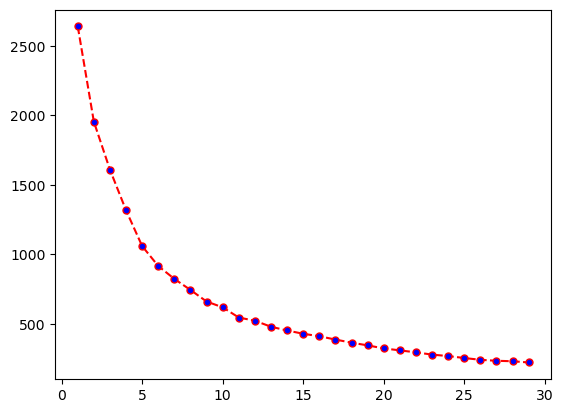

In [128]:
inertias = []
for k in range(1,30):
    kmeans_cluster = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans_cluster.fit(data_scaled)
    inertias.append(kmeans_cluster.inertia_)

plt.plot(range(1,30), inertias,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=5)

In [138]:
kmeans_cluster = KMeans(n_clusters=5,random_state=10, n_init=10)
kmeans_cluster.fit(data_scaled)

KMeans(n_clusters=5, n_init=10, random_state=10)

In [140]:
clusters = kmeans_cluster.predict(data_scaled)
pd.Series(clusters).value_counts()

0    270
4     96
2     63
1     10
3      1
dtype: int64

In [142]:
data['cluster'] = clusters

In [146]:
data[data['cluster'] == 3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
183,36847,43950,20170,36534,239,47943,3


In [147]:
from sklearn.cluster import DBSCAN

In [157]:
dbscan_cluster = DBSCAN(min_samples=10)

In [158]:
dbscan_cluster.fit(data_scaled)

DBSCAN(min_samples=10)

In [159]:
clusters = dbscan_cluster.fit_predict(data_scaled)
pd.Series(clusters).value_counts()

-1    227
 0    192
 1     21
dtype: int64

In [161]:
pca_cluster = PCA(n_components=2)
pca_data = pca_cluster.fit_transform(data_scaled)

In [166]:
df_cluster = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

In [167]:
df_cluster['cluster'] = clusters

In [170]:
df_cluster['cluster'].value_counts()

-1    227
 0    192
 1     21
Name: cluster, dtype: int64

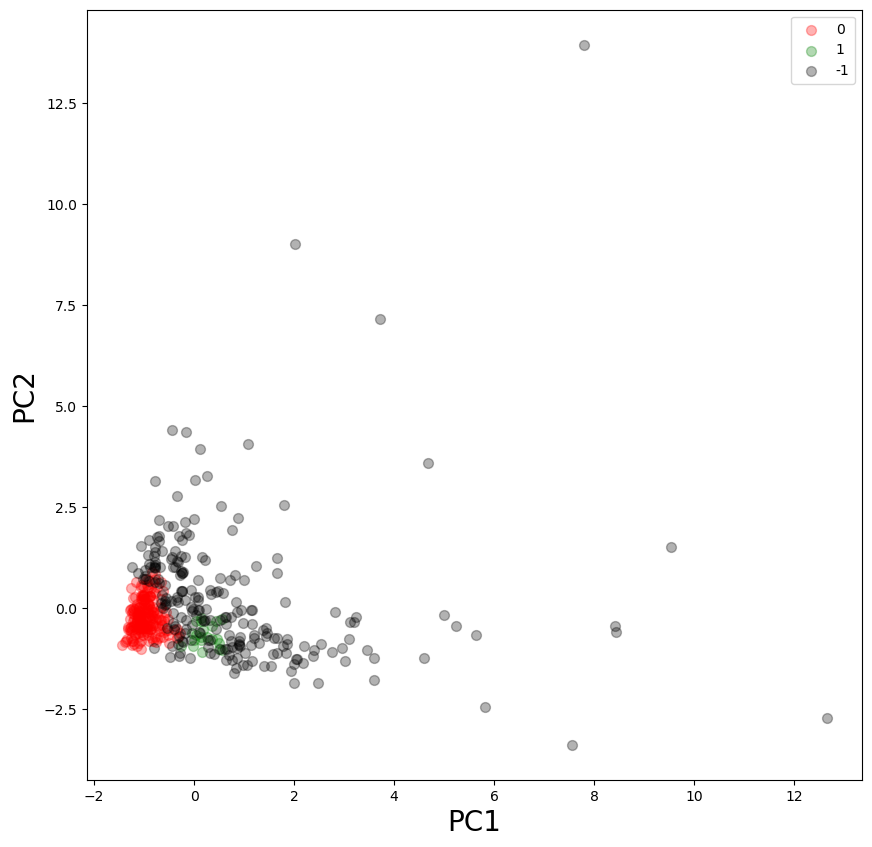

In [172]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
targets =[0, 1,-1]
colors = ['r','g','black']

for target,color in zip(targets, colors):
    maskindex = df_cluster['cluster'] == target
    plt.scatter(df_cluster.loc[maskindex, 'PC1'],
                df_cluster.loc[maskindex, 'PC2'],
                c=color,s=50,alpha=0.3)

plt.legend(targets)

